In [57]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


In [59]:
df=pd.read_csv("Automobile.csv")
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [61]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'origin' column
df['origin_encoded'] = label_encoder.fit_transform(df['origin'])

# Drop the original 'origin' column
df = df.drop(columns=['origin'])

# Display the first few rows to verify
print(df.head())

                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         304.0       150.0   
4                ford torino  17.0          8         302.0       140.0   

   weight  acceleration  model_year  origin_encoded  
0    3504          12.0          70               2  
1    3693          11.5          70               2  
2    3436          11.0          70               2  
3    3433          12.0          70               2  
4    3449          10.5          70               2  


In [63]:
df['name_encoded'] = label_encoder.fit_transform(df['name'])

# Drop the original 'name' column
df = df.drop(columns=['name'])

#Impute missing values (e.g., using the mean of each column):print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin_encoded  name_encoded  
0          70               2            49  
1          70               2            36  
2          70               2           231  
3          70               2            14  
4          70               2           161  


In [71]:
#Impute missing values (e.g., using the mean of each column):
data_numeric = data_numeric.fillna(data_numeric.mean())


In [73]:
#Drop rows with missing values:
data_numeric = data_numeric.dropna()


In [77]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")


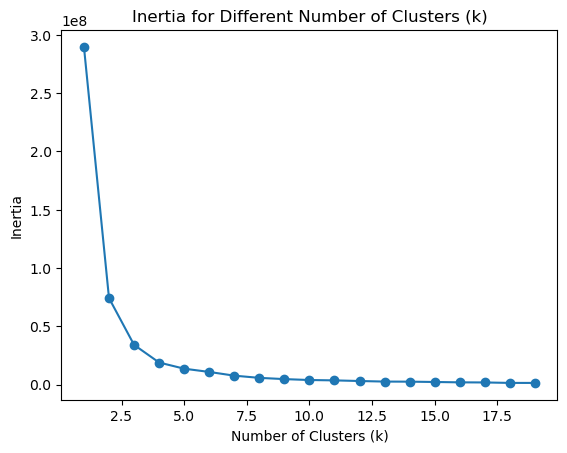

In [79]:
import numpy as np  # Make sure you import NumPy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Drop non-numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Fill missing values with the mean (or use another imputation strategy)
data_numeric = data_numeric.fillna(data_numeric.mean())

# Fit KMeans for different k values
inertias = []
K_range = range(1, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_numeric)
    inertias.append(kmeans.inertia_)

# Plotting the inertia values
plt.plot(K_range, inertias, marker='o')
plt.title('Inertia for Different Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [83]:
df_numeric = df.select_dtypes(include=[np.number])

# Drop rows with any NaN values
df_numeric = df_numeric.dropna()

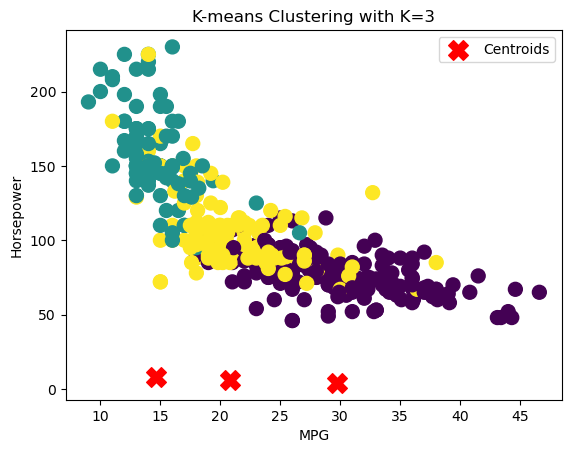

In [85]:
# Fit KMeans with optimal_k clusters (3 in this case)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_numeric)

# Get the centroids and labels for the clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters using two numeric columns (e.g., 'mpg' and 'horsepower')
plt.scatter(df_numeric['mpg'], df_numeric['horsepower'], c=labels, cmap='viridis', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-means Clustering with K={optimal_k}')
plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.legend()
plt.show()